In [3]:
# Install missing packages if not already installed
!pip install textblob nltk

# Imports
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Display settings
pd.set_option("display.max_columns", None)


[nltk_data] Downloading package vader_lexicon to C:\Users\M.ANTONY
[nltk_data]     ROJES\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Load datasets
market   = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\open-data-master\cleaned_market_value_data.csv")
injuries = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\open-data-master\injuries_raw.csv")
tweets   = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\open-data-master\Sentiment Analysis.csv")
events   = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\open-data-master\events_out.csv")


print("Market:", market.shape)
print("Injuries:", injuries.shape)
print("Tweets:", tweets.shape)
print("Events:", events.shape)


Market: (957, 3)
Injuries: (656, 43)
Tweets: (22524, 6)
Events: (4165, 107)


In [5]:
def clean_dataframe(df, name):
    print(f"\n--- Cleaning {name} ---")
    
    # 1. Remove duplicates
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]
    print(f"Removed {before - after} duplicates")
    
    # 2. Handle missing values (numeric vs categorical separately)
    for col in df.columns:
        if df[col].dtype in ["float64", "int64"]:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna("Unknown")
    
    print("Remaining missing values:", df.isna().sum().sum())
    return df


In [6]:
market_clean   = clean_dataframe(market, "Market Values")
injuries_clean = clean_dataframe(injuries, "Injuries")
tweets_clean   = clean_dataframe(tweets, "Tweets")
events_clean   = clean_dataframe(events, "Events")



--- Cleaning Market Values ---
Removed 0 duplicates
Remaining missing values: 0

--- Cleaning Injuries ---
Removed 0 duplicates
Remaining missing values: 0

--- Cleaning Tweets ---
Removed 0 duplicates
Remaining missing values: 0

--- Cleaning Events ---
Removed 0 duplicates
Remaining missing values: 0


In [7]:
Phase 4

SyntaxError: invalid syntax (2648898567.py, line 1)

In [ ]:
import os

# Create cleaned_data folder if not exists
os.makedirs("../data/cleaned_data", exist_ok=True)

market_clean.to_csv("../data/cleaned_data/market_clean.csv", index=False)
injuries_clean.to_csv("../data/cleaned_data/injuries_clean.csv", index=False)
tweets_clean.to_csv("../data/cleaned_data/tweets_clean.csv", index=False)
events_clean.to_csv("../data/cleaned_data/events_clean.csv", index=False)

print("✅ All cleaned files saved in data/cleaned_data/")


✅ All cleaned files saved in data/cleaned_data/


In [ ]:
import pandas as pd
import os

# Path where your cleaned CSVs are stored
path = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data"

# List all files in cleaned_data folder
files = os.listdir(path)
print("✅ Files inside cleaned_data/:", files)

# Go through each file and check details
for f in files:
    print("\n📂 Checking:", f)
    
    df = pd.read_csv(os.path.join(path, f))
    
    # Shape
    print("   → Shape:", df.shape)
    
    # Preview first 3 rows
    print(df.head(3))
    
    # Duplicates check
    print("   → Duplicates:", df.duplicated().sum())
    
    # Missing values check
    print("   → Missing values per column:\n", df.isna().sum().to_dict())


✅ Files inside cleaned_data/: ['events_clean.csv', 'injuries_clean.csv', 'injury_features.csv', 'market_clean.csv', 'market_features.csv', 'performance_features.csv', 'player_features.csv', 'tweets_clean.csv']

📂 Checking: events_clean.csv
   → Shape: (4165, 107)
                                     id  index  period     timestamp  minute  \
0  963946e5-3c66-401f-a73b-3737b8fd93ff      1       1  00:00:00.000       0   
1  ffb0fe8c-dd64-4bda-86ea-d5b23b83c221      2       1  00:00:00.000       0   
2  1c519ba7-f860-48d9-b130-cbaf9e9dee79      3       1  00:00:00.000       0   

   second  possession  duration  type.id    type.name  possession_team.id  \
0       0           1      0.00       35  Starting XI                 785   
1       0           1      0.00       35  Starting XI                 785   
2       0           1      8.88       18   Half Start                 785   

  possession_team.name  play_pattern.id play_pattern.name  team.id team.name  \
0              Croatia    

In [ ]:
Phase 5

In [ ]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

# === Set this to your cleaned_data folder ===
CLEAN_DIR = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data"
OUT_DIR   = os.path.join(CLEAN_DIR)  # save outputs here too

# small helper to drop unnamed cols (index columns that sneaked in)
def drop_unnamed(df):
    return df.loc[:, ~df.columns.str.startswith('Unnamed')]

# standardize names for joining across files
def norm_name(x: str) -> str:
    if pd.isna(x):
        return ""
    s = str(x).strip().lower()
    s = s.replace(".", "").replace("-", " ").replace("’","'").replace("`","'")
    s = " ".join(s.split())
    return s


In [ ]:
events   = drop_unnamed(pd.read_csv(os.path.join(CLEAN_DIR, "events_clean.csv")))
injuries = drop_unnamed(pd.read_csv(os.path.join(CLEAN_DIR, "injuries_clean.csv")))
market   = drop_unnamed(pd.read_csv(os.path.join(CLEAN_DIR, "market_clean.csv")))
tweets   = drop_unnamed(pd.read_csv(os.path.join(CLEAN_DIR, "tweets_clean.csv")))

print("events:", events.shape)
print("injuries:", injuries.shape)
print("market:", market.shape)
print("tweets:", tweets.shape)

# Attach normalized player keys where possible
# events: try common StatsBomb columns
cand_event_player_cols = [c for c in events.columns if c.lower() in ["player.name","player","name","player_name"]]
if cand_event_player_cols:
    events["player_key"] = events[cand_event_player_cols[0]].map(norm_name)
else:
    events["player_key"] = ""  # fallback

# market: Name column exists per your CSV
market["player_key"] = market["Name"].map(norm_name)

# injuries: try to locate player column by common names
cand_inj_player_cols = [c for c in injuries.columns if c.lower() in ["player","name","player_name","full_name"]]
if cand_inj_player_cols:
    injuries["player_key"] = injuries[cand_inj_player_cols[0]].map(norm_name)
else:
    injuries["player_key"] = ""

# tweets: only useful if you added a player column; otherwise skip here
cand_tw_player_cols = [c for c in tweets.columns if "player" in c.lower() or c.lower() in ["name"]]
if cand_tw_player_cols:
    tweets["player_key"] = tweets[cand_tw_player_cols[0]].map(norm_name)


events: (4165, 107)
injuries: (656, 43)
market: (957, 3)
tweets: (22524, 5)


In [ ]:
perf = pd.DataFrame()

# Helper: safe column check
def has(col): 
    return col in events.columns

# Shots & Goals
if has("type.name"):
    shots_df = events[events["type.name"].str.lower().eq("shot")]
    shots_per_player = shots_df.groupby("player_key").size().rename("shots")
    perf = shots_per_player.to_frame().reset_index()
else:
    perf = pd.DataFrame({"player_key": [], "shots": []})

# Goals (StatsBomb: shot.outcome.name == 'Goal')
if has("shot.outcome.name"):
    goals_df = events[
        events["type.name"].str.lower().eq("shot") &
        events["shot.outcome.name"].str.lower().eq("goal")
    ]
    goals = goals_df.groupby("player_key").size().rename("goals")
    perf = perf.merge(goals, on="player_key", how="outer")
else:
    perf["goals"] = np.nan

# Passes
if has("type.name"):
    pass_df = events[events["type.name"].str.lower().eq("pass")]
    passes_total = pass_df.groupby("player_key").size().rename("passes_total")

    # completed logic: in StatsBomb, completed passes often have no "pass.outcome.name"
    # you filled missings with "Unknown" earlier, so treat "Unknown" as completed.
    if has("pass.outcome.name"):
        completed_mask = pass_df["pass.outcome.name"].isin([np.nan, None, "Unknown"])
        passes_completed = pass_df[completed_mask].groupby("player_key").size().rename("passes_completed")
    else:
        passes_completed = pd.Series(0, index=passes_total.index, name="passes_completed")

    perf = perf.merge(passes_total, on="player_key", how="outer") \
               .merge(passes_completed, on="player_key", how="outer")
    perf["pass_accuracy"] = (perf["passes_completed"] / perf["passes_total"]).replace([np.inf, -np.inf], np.nan)
else:
    perf[["passes_total","passes_completed","pass_accuracy"]] = np.nan

# Assists: try several known columns
assist_cols = [c for c in ["pass.goal_assist", "pass.shot_assist", "pass.assisted_shot_id"] if has(c)]
assists = None
if assist_cols:
    # Priority: explicit boolean cols if present
    if "pass.goal_assist" in assist_cols and events["pass.goal_assist"].isin(["True", True, 1]).any():
        assists = events[events["pass.goal_assist"].isin(["True", True, 1])].groupby("player_key").size()
    elif "pass.shot_assist" in assist_cols and events["pass.shot_assist"].isin(["True", True, 1]).any():
        assists = events[events["pass.shot_assist"].isin(["True", True, 1])].groupby("player_key").size()
    elif "pass.assisted_shot_id" in assist_cols:
        # any non-Unknown/NaN assisted shot id counts as an assist
        mask = (~events["pass.assisted_shot_id"].isin(["Unknown"])) & (events["pass.assisted_shot_id"].notna())
        assists = events[mask].groupby("player_key").size()
if assists is not None:
    perf = perf.merge(assists.rename("assists"), on="player_key", how="outer")
else:
    perf["assists"] = np.nan

# Matches played: search for a match id-ish column
match_cols = [c for c in events.columns if "match" in c.lower() and "id" in c.lower()]
if match_cols:
    mcol = match_cols[0]
    mp = events.dropna(subset=["player_key", mcol]).groupby(["player_key", mcol]).size().reset_index()
    matches_played = mp.groupby("player_key")[mcol].nunique().rename("matches_played")
    perf = perf.merge(matches_played, on="player_key", how="outer")
else:
    perf["matches_played"] = np.nan

# Fill NaNs with 0 for counts
for c in ["shots","goals","passes_total","passes_completed","assists","matches_played"]:
    if c in perf.columns:
        perf[c] = perf[c].fillna(0).astype("int64", errors="ignore")

perf["pass_accuracy"] = perf["pass_accuracy"].astype(float)

# Save
perf.to_csv(os.path.join(OUT_DIR, "performance_features.csv"), index=False)
print("✅ Saved:", os.path.join(OUT_DIR, "performance_features.csv"))
perf.head(30)


✅ Saved: C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\performance_features.csv


,player_key,shots,goals,passes_total,passes_completed,pass_accuracy,assists,matches_played
0,andrej kramarić,3,0,13,13,1.000000,0,0
1,ante rebić,3,0,26,10,0.384615,0,0
2,ashley young,0,0,31,22,0.709677,0,0
3,bamidele alli,0,0,46,35,0.760870,0,0
4,danijel subašić,0,0,37,29,0.783784,0,0
5,danny rose,0,0,15,11,0.733333,0,0
6,dejan lovren,1,0,54,48,0.888889,0,0
7,domagoj vida,0,0,46,38,0.826087,0,0
8,eric dier,1,0,21,20,0.952381,0,0
9,harry kane,2,0,33,17,0.515152,0,0


In [ ]:
inj = injuries.copy()

# Guess columns
day_cols  = [c for c in inj.columns if "day" in c.lower() and ("miss" in c.lower() or "out" in c.lower())]
date_cols = [c for c in inj.columns if "date" in c.lower() and ("start" in c.lower() or "inj" in c.lower() or c.lower() == "date")]

# Convert days missed to numeric
if day_cols:
    dcol = day_cols[0]
    inj[dcol] = pd.to_numeric(inj[dcol], errors="coerce")
else:
    inj["days_missed_auto"] = np.nan
    dcol = "days_missed_auto"

# Convert date to datetime (optional)
if date_cols:
    dtcol = date_cols[0]
    inj[dtcol] = pd.to_datetime(inj[dtcol], errors="coerce")
else:
    dtcol = None

agg = inj.groupby("player_key").agg(
    injury_count = ("player_key","size"),
    avg_days_missed = (dcol, "mean"),
    max_days_missed = (dcol, "max")
).reset_index()

# Optional: injuries in last 180 days if we have dates
if dtcol:
    cutoff = pd.Timestamp.today() - pd.Timedelta(days=180)
    recent = inj[inj[dtcol] >= cutoff].groupby("player_key").size().rename("injuries_last_180d")
    agg = agg.merge(recent, on="player_key", how="left")
else:
    agg["injuries_last_180d"] = np.nan

# Clean up
agg["avg_days_missed"] = agg["avg_days_missed"].fillna(0).round(1)
agg["max_days_missed"] = agg["max_days_missed"].fillna(0).astype(int, errors="ignore")
agg["injuries_last_180d"] = agg["injuries_last_180d"].fillna(0).astype(int, errors="ignore")

agg.to_csv(os.path.join(OUT_DIR, "injury_features.csv"), index=False)
print("✅ Saved:", os.path.join(OUT_DIR, "injury_features.csv"))
agg.head(30)


✅ Saved: C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\injury_features.csv


,player_key,injury_count,avg_days_missed,max_days_missed,injuries_last_180d
0,aaron hickey,2,299.5,517,0
1,aaron lennon,1,19.0,19,0
2,aaron wan bissaka,4,19.8,43,0
3,abdoulaye doucouré,4,45.8,64,0
4,acob ramsey,1,46.0,46,0
5,alex iwobi,3,24.3,35,0
6,alexander isak,3,26.7,30,0
7,alexandre lacazette,3,23.7,48,0
8,allan,2,36.0,58,0
9,allan saint maximin,8,27.0,61,0


In [ ]:
mkt = market.copy()

# Normalize fee
mkt["fee_million"] = pd.to_numeric(mkt["Fee"], errors="coerce").fillna(0.0)

# Buckets
bins   = [-0.01, 0.0, 5, 15, 30, 60, 120, np.inf]
labels = ["Free", "0-5m", "5-15m", "15-30m", "30-60m", "60-120m", "120m+"]
mkt["fee_bucket"] = pd.cut(mkt["fee_million"], bins=bins, labels=labels, include_lowest=True, right=True)

# Flags
mkt["is_free_transfer"] = (mkt["fee_million"] == 0).astype(int)
mkt["high_value_flag"]  = (mkt["fee_million"] >= 50).astype(int)

# Keep essentials
market_feat = mkt[["player_key", "Club", "fee_million", "fee_bucket", "is_free_transfer", "high_value_flag"]].drop_duplicates("player_key")

market_feat.to_csv(os.path.join(OUT_DIR, "market_features.csv"), index=False)
print("✅ Saved:", os.path.join(OUT_DIR, "market_features.csv"))
market_feat.head(30)


✅ Saved: C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\market_features.csv


,player_key,Club,fee_million,fee_bucket,is_free_transfer,high_value_flag
0,erling haaland,Man City,60.00,30-60m,0,1
1,enzo fernández,Chelsea,121.00,120m+,0,1
2,antony,Man Utd,95.00,60-120m,0,1
3,wesley fofana,Chelsea,80.40,60-120m,0,1
4,aurélien tchouaméni,Real Madrid,80.00,60-120m,0,1
5,casemiro,Man Utd,70.65,60-120m,0,1
6,mykhaylo mudryk,Chelsea,70.00,60-120m,0,1
7,alexander isak,Newcastle,70.00,60-120m,0,1
8,matthijs de ligt,Bayern Munich,67.00,60-120m,0,1
9,raheem sterling,Chelsea,56.20,30-60m,0,1


In [ ]:
base = market_feat.copy()   # seed with market list of players

# Merge performance
if os.path.exists(os.path.join(OUT_DIR, "performance_features.csv")):
    perf = pd.read_csv(os.path.join(OUT_DIR, "performance_features.csv"))
    base = base.merge(perf, on="player_key", how="left")
else:
    print("⚠️ performance_features.csv not found")

# Merge injuries
if os.path.exists(os.path.join(OUT_DIR, "injury_features.csv")):
    injf = pd.read_csv(os.path.join(OUT_DIR, "injury_features.csv"))
    base = base.merge(injf, on="player_key", how="left")
else:
    print("⚠️ injury_features.csv not found")

# Optional: if your tweets_clean has player_key, you could add avg sentiment here
if "player_key" in tweets.columns and "Sentiment" in tweets.columns:
    # map sentiment text to scores (simple)
    sent_map = {"positive": 1, "neutral": 0, "negative": -1}
    tdf = tweets.copy()
    tdf["sent_score"] = tdf["Sentiment"].str.lower().map(sent_map)
    tw_agg = tdf.groupby("player_key")["sent_score"].mean().rename("avg_sentiment")
    base = base.merge(tw_agg, on="player_key", how="left")
else:
    base["avg_sentiment"] = np.nan

# Final tidying
num_cols = ["fee_million","is_free_transfer","high_value_flag","shots","goals","passes_total",
            "passes_completed","pass_accuracy","assists","matches_played",
            "injury_count","avg_days_missed","max_days_missed","injuries_last_180d","avg_sentiment"]
for c in num_cols:
    if c in base.columns:
        if c == "pass_accuracy":
            base[c] = base[c].astype(float)
        else:
            base[c] = pd.to_numeric(base[c], errors="coerce")

# Save
out_path = os.path.join(OUT_DIR, "player_features.csv")
base.to_csv(out_path, index=False)
print("✅ Saved:", out_path)
base.head(30)


✅ Saved: C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\player_features.csv


,player_key,Club,fee_million,fee_bucket,is_free_transfer,high_value_flag,shots,goals,passes_total,passes_completed,pass_accuracy,assists,matches_played,injury_count,avg_days_missed,max_days_missed,injuries_last_180d,avg_sentiment
0,erling haaland,Man City,60.00,30-60m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,enzo fernández,Chelsea,121.00,120m+,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,antony,Man Utd,95.00,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wesley fofana,Chelsea,80.40,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aurélien tchouaméni,Real Madrid,80.00,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,casemiro,Man Utd,70.65,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,mykhaylo mudryk,Chelsea,70.00,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,alexander isak,Newcastle,70.00,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,26.7,30.0,0.0,NaN
8,matthijs de ligt,Bayern Munich,67.00,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,raheem sterling,Chelsea,56.20,30-60m,0,1,1.0,0.0,11.0,8.0,0.727273,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
pf = pd.read_csv(os.path.join(OUT_DIR, "player_features.csv"))
print(pf.shape)
display(pf.head(10))

# How many players have any events?
print("Players with events:", (pf["shots"].fillna(0) + pf["passes_total"].fillna(0)).gt(0).sum())

# Missing join diagnostics
missing_perf = pf["shots"].isna().sum()
missing_inj  = pf["injury_count"].isna().sum()
print(f"Missing performance rows: {missing_perf}")
print(f"Missing injury rows: {missing_inj}")

# Distribution snapshot
print(pf[["fee_million","goals","assists","pass_accuracy","injury_count","avg_days_missed"]].describe())


(938, 18)


,player_key,Club,fee_million,fee_bucket,is_free_transfer,high_value_flag,shots,goals,passes_total,passes_completed,pass_accuracy,assists,matches_played,injury_count,avg_days_missed,max_days_missed,injuries_last_180d,avg_sentiment
0,erling haaland,Man City,60.00,30-60m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,enzo fernández,Chelsea,121.00,120m+,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,antony,Man Utd,95.00,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wesley fofana,Chelsea,80.40,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aurélien tchouaméni,Real Madrid,80.00,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,casemiro,Man Utd,70.65,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,mykhaylo mudryk,Chelsea,70.00,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,alexander isak,Newcastle,70.00,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,26.7,30.0,0.0,NaN
8,matthijs de ligt,Bayern Munich,67.00,60-120m,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,raheem sterling,Chelsea,56.20,30-60m,0,1,1.0,0.0,11.0,8.0,0.727273,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Players with events: 2
Missing performance rows: 936
Missing injury rows: 903
       fee_million  goals  assists  pass_accuracy  injury_count  \
count   938.000000    2.0      2.0       2.000000     35.000000   
mean      8.011365    0.0      0.0       0.808081      2.428571   
std      11.549730    0.0      0.0       0.114280      1.819595   
min       1.000000    0.0      0.0       0.727273      1.000000   
25%       2.500000    0.0      0.0       0.767677      1.000000   
50%       4.085000    0.0      0.0       0.808081      2.000000   
75%       8.500000    0.0      0.0       0.848485      3.000000   
max     121.000000    0.0      0.0       0.888889      9.000000   

       avg_days_missed  
count        35.000000  
mean         57.268571  
std          61.813033  
min           5.000000  
25%          21.500000  
50%          36.000000  
75%          73.500000  
max         299.500000  


In [ ]:
Phase 5

In [ ]:
import pandas as pd
import numpy as np
import os

# Paths
base_path = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data"

# Load datasets
# Load cleaned datasets
events   = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\events_clean.csv")
injuries = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\injuries_clean.csv")
market   = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\market_clean.csv")
tweets   = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\tweets_clean.csv")


print("Events:", events.shape)
print("Injuries:", injuries.shape)
print("Market:", market.shape)
print("Tweets:", tweets.shape)


Events: (4165, 107)
Injuries: (656, 43)
Market: (957, 3)
Tweets: (22524, 6)


In [ ]:
print(events.columns.tolist())


['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'duration', 'type.id', 'type.name', 'possession_team.id', 'possession_team.name', 'play_pattern.id', 'play_pattern.name', 'team.id', 'team.name', 'tactics.formation', 'tactics.lineup', 'related_events', 'location', 'player.id', 'player.name', 'position.id', 'position.name', 'pass.recipient.id', 'pass.recipient.name', 'pass.length', 'pass.angle', 'pass.height.id', 'pass.height.name', 'pass.end_location', 'pass.body_part.id', 'pass.body_part.name', 'pass.type.id', 'pass.type.name', 'carry.end_location', 'under_pressure', 'pass.outcome.id', 'pass.outcome.name', 'ball_receipt.outcome.id', 'ball_receipt.outcome.name', 'counterpress', 'pass.switch', 'interception.outcome.id', 'interception.outcome.name', 'duel.outcome.id', 'duel.outcome.name', 'duel.type.id', 'duel.type.name', 'ball_recovery.recovery_failure', 'foul_committed.offensive', 'foul_won.defensive', 'shot.statsbomb_xg', 'shot.end_location', 'shot.technique.id'

In [ ]:
# ✅ Aggregate key performance stats per player
perf_features = events.groupby("player.name").agg({
    "pass.outcome.name": lambda x: (x == "Complete").sum(),   # completed passes
    "shot.statsbomb_xg": "sum",                               # total expected goals
    "shot.outcome.name": lambda x: (x == "Goal").sum(),       # count goals
    "pass.goal_assist": "sum"                                 # assists
}).reset_index()

# ✅ Rename columns for clarity
perf_features.rename(columns={
    "player.name": "player",
    "pass.outcome.name": "passes_completed",
    "shot.statsbomb_xg": "expected_goals",
    "shot.outcome.name": "goals",
    "pass.goal_assist": "assists"
}, inplace=True)

print("✅ Performance features created:", perf_features.shape)
perf_features.head(30)


✅ Performance features created: (31, 5)


,player,passes_completed,expected_goals,goals,assists
0,Andrej Kramarić,0,2.654001,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
1,Ante Rebić,0,9.025964,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
2,Ashley Young,0,5.599779,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
3,Bamidele Alli,0,12.271856,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
4,Danijel Subašić,0,5.540207,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
5,Danny Rose,0,2.502029,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
6,Dejan Lovren,0,8.525549,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
7,Domagoj Vida,0,6.850793,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
8,Eric Dier,0,3.475921,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
9,Harry Kane,0,9.359422,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...


In [ ]:
print(injuries.columns)


Index(['Name', 'Team Name', 'Position', 'Age', 'Season', 'FIFA rating',
       'Injury', 'Date of Injury', 'Date of return',
       'Match1_before_injury_Result', 'Match1_before_injury_Opposition',
       'Match1_before_injury_GD', 'Match1_before_injury_Player_rating',
       'Match2_before_injury_Result', 'Match2_before_injury_Opposition',
       'Match2_before_injury_GD', 'Match2_before_injury_Player_rating',
       'Match3_before_injury_Result', 'Match3_before_injury_Opposition',
       'Match3_before_injury_GD', 'Match3_before_injury_Player_rating',
       'Match1_missed_match_Result', 'Match1_missed_match_Opposition',
       'Match1_missed_match_GD', 'Match2_missed_match_Result',
       'Match2_missed_match_Opposition', 'Match2_missed_match_GD',
       'Match3_missed_match_Result', 'Match3_missed_match_Opposition',
       'Match3_missed_match_GD', 'Match1_after_injury_Result',
       'Match1_after_injury_Opposition', 'Match1_after_injury_GD',
       'Match1_after_injury_Player_rat

In [ ]:
print(market.columns)

Index(['Club', 'Name', 'Fee'], dtype='object')


In [ ]:
import pandas as pd

# Load cleaned datasets
events   = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\events_clean.csv")
injuries = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\injuries_clean.csv")
market   = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\market_clean.csv")
tweets   = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\tweets_clean.csv")

print("✅ Datasets Loaded")
print("Events:", events.shape)
print("Injuries:", injuries.shape)
print("Market:", market.shape)
print("Tweets:", tweets.shape)


✅ Datasets Loaded
Events: (4165, 107)
Injuries: (656, 43)
Market: (957, 3)
Tweets: (22524, 6)


In [ ]:
# Create performance features per player from events data
perf_features = events.groupby("player.name").agg({
    "pass.length": "count",   # proxy for total passes
    "shot.statsbomb_xg": "sum",  # total expected goals
    "shot.outcome.name": lambda x: (x == "Goal").sum(),  # total goals
    "pass.goal_assist": "sum"   # assists from event flag
}).reset_index()

# Rename for clarity
perf_features.rename(columns={
    "player.name": "player",
    "pass.length": "passes_attempted",
    "shot.statsbomb_xg": "expected_goals",
    "shot.outcome.name": "goals",
    "pass.goal_assist": "assists"
}, inplace=True)

print("✅ Performance features created:", perf_features.shape)
perf_features.head()


✅ Performance features created: (31, 5)


,player,passes_attempted,expected_goals,goals,assists
0,Andrej Kramarić,44,2.654001,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
1,Ante Rebić,147,9.025964,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
2,Ashley Young,94,5.599779,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
3,Bamidele Alli,206,12.271856,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...
4,Danijel Subašić,93,5.540207,0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...


In [ ]:
# Create injury-related features
injury_features = injuries.groupby("Name").agg({
    "Injury": "count",       # number of injuries
    "days_out": "sum"        # total days missed
}).reset_index()

injury_features.rename(columns={
    "Name": "player",
    "Injury": "injury_count",
    "days_out": "total_days_out"
}, inplace=True)

print("✅ Injury features created:", injury_features.shape)
injury_features.head()


✅ Injury features created: (224, 3)


,player,injury_count,total_days_out
0,Aaron Hickey,2,599.0
1,Aaron Lennon,1,19.0
2,Aaron Wan-Bissaka,4,79.0
3,Abdoulaye Doucouré,4,183.0
4,Alex Iwobi,3,73.0


In [ ]:
# Market dataset: ['Club', 'Name', 'Fee']
# We'll take average transfer fee as market value proxy

contract_features = market.groupby("Name").agg({
    "Fee": "mean"
}).reset_index()

contract_features.rename(columns={
    "Name": "player",
    "Fee": "avg_market_value"
}, inplace=True)

print("✅ Market features created:", contract_features.shape)
contract_features.head()


✅ Market features created: (938, 2)


,player,avg_market_value
0,Aaron Boupendza,7.00
1,Aaron Hickey,16.50
2,Aarón Herrera,4.71
3,Abdelhamid Sabiri,1.75
4,Abdou Harroui,1.00


In [ ]:
# Merge all feature sets
player_features = perf_features.merge(injury_features, on="player", how="outer")
player_features = player_features.merge(contract_features, on="player", how="outer")

print("✅ Final Player Features:", player_features.shape)
player_features.head(100)


✅ Final Player Features: (1148, 8)


,player,passes_attempted,expected_goals,goals,assists,injury_count,total_days_out,avg_market_value
0,Aaron Boupendza,NaN,NaN,NaN,NaN,NaN,NaN,7.00
1,Aaron Hickey,NaN,NaN,NaN,NaN,2.0,599.0,16.50
2,Aaron Lennon,NaN,NaN,NaN,NaN,1.0,19.0,NaN
3,Aaron Wan-Bissaka,NaN,NaN,NaN,NaN,4.0,79.0,NaN
4,Aarón Herrera,NaN,NaN,NaN,NaN,NaN,NaN,4.71
...,...,...,...,...,...,...,...,...
95,Andrés Andrade,NaN,NaN,NaN,NaN,NaN,NaN,1.25
96,Andrés Perea,NaN,NaN,NaN,NaN,NaN,NaN,7.13
97,Andy Carroll,NaN,NaN,NaN,NaN,4.0,182.0,NaN
98,Anel Ahmedhodzic,NaN,NaN,NaN,NaN,NaN,NaN,4.50


In [ ]:
import os

# Define output path
output_dir = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered"
output_path = os.path.join(output_dir, "player_features.csv")

# Create folder if it doesn’t exist
os.makedirs(output_dir, exist_ok=True)

# Save file
player_features.to_csv(output_path, index=False)

print("📁 Saved:", output_path)



📁 Saved: C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features.csv


In [ ]:
import os

# Define output path
output_dir = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered"
output_path = os.path.join(output_dir, "player_features.csv")

# Create folder if it doesn’t exist
os.makedirs(output_dir, exist_ok=True)

# Save file
player_features.to_csv(output_path, index=False)

print("📁 Saved:", output_path)


📁 Saved: C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features.csv


In [ ]:
print("🔎 Columns:", list(player_features.columns))


🔎 Columns: ['player', 'passes_attempted', 'expected_goals', 'goals', 'assists', 'injury_count', 'total_days_out', 'avg_market_value']


In [ ]:
# Check for duplicates
print("Duplicates:", player_features.duplicated().sum())

# Missing values
print("Missing values per column:\n", player_features.isna().sum())

# Basic stats for numeric features
print("\n📊 Summary Statistics:\n", player_features.describe())


Duplicates: 0
Missing values per column:
 player                 0
passes_attempted    1117
expected_goals      1117
goals               1117
assists             1117
injury_count         924
total_days_out       924
avg_market_value     210
dtype: int64

📊 Summary Statistics:
        passes_attempted  expected_goals      goals  injury_count  \
count         31.000000       31.000000  31.000000    224.000000   
mean         134.354839        8.027096   0.096774      2.928571   
std           76.752654        4.571257   0.300537      2.150041   
min            6.000000        0.357433   0.000000      1.000000   
25%           70.000000        4.143122   0.000000      1.000000   
50%          144.000000        8.602184   0.000000      2.000000   
75%          200.000000       11.928438   0.000000      4.000000   
max          266.000000       15.817113   1.000000     11.000000   

       total_days_out  avg_market_value  
count      224.000000        938.000000  
mean       130.584821   

In [ ]:
print("🔎 Columns present in player_features.csv:")
print(player_features.columns.tolist())


🔎 Columns present in player_features.csv:
['player', 'passes_attempted', 'expected_goals', 'goals', 'assists', 'injury_count', 'total_days_out', 'avg_market_value']


In [ ]:
# Check all columns
print("🔎 Columns:", list(player_features.columns))

# Check duplicates
print("Duplicates:", player_features.duplicated().sum())

# Check missing values
print("Missing values per column:\n", player_features.isna().sum())

# Summary stats for numeric features
print("\n📊 Summary Statistics:\n", player_features.describe())

# Quick checks
if "expected_goals" in player_features.columns:
    print("\n🏆 Top 5 players by Expected Goals:")
    print(player_features[['player', 'expected_goals']].dropna().sort_values(by="expected_goals", ascending=False).head(5))

if "assists" in player_features.columns:
    print("\n🎯 Top 5 players by Assists:")
    print(player_features[['player', 'assists']].dropna().sort_values(by="assists", ascending=False).head(5))

if "total_days_out" in player_features.columns:
    print("\n🩺 Top 5 players by Total Days Out (Injury):")
    print(player_features[['player', 'total_days_out']].dropna().sort_values(by="total_days_out", ascending=False).head(5))

if "avg_market_value" in player_features.columns:
    print("\n💰 Top 5 players by Market Value:")
    print(player_features[['player', 'avg_market_value']].dropna().sort_values(by="avg_market_value", ascending=False).head(5))


🔎 Columns: ['player', 'passes_attempted', 'expected_goals', 'goals', 'assists', 'injury_count', 'total_days_out', 'avg_market_value']
Duplicates: 0
Missing values per column:
 player                 0
passes_attempted    1117
expected_goals      1117
goals               1117
assists             1117
injury_count         924
total_days_out       924
avg_market_value     210
dtype: int64

📊 Summary Statistics:
        passes_attempted  expected_goals      goals  injury_count  \
count         31.000000       31.000000  31.000000    224.000000   
mean         134.354839        8.027096   0.096774      2.928571   
std           76.752654        4.571257   0.300537      2.150041   
min            6.000000        0.357433   0.000000      1.000000   
25%           70.000000        4.143122   0.000000      1.000000   
50%          144.000000        8.602184   0.000000      2.000000   
75%          200.000000       11.928438   0.000000      4.000000   
max          266.000000       15.817113   1

In [ ]:
# --- Cell 1: Setup & Load Data ---
import pandas as pd
import os

# Path to final Phase 5 dataset
path = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features.csv"

# Load dataset
df = pd.read_csv(path)

print("✅ Data Loaded Successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(5)


✅ Data Loaded Successfully
Shape: (1148, 8)
Columns: ['player', 'passes_attempted', 'expected_goals', 'goals', 'assists', 'injury_count', 'total_days_out', 'avg_market_value']


,player,passes_attempted,expected_goals,goals,assists,injury_count,total_days_out,avg_market_value
0,Aaron Boupendza,NaN,NaN,NaN,NaN,NaN,NaN,7.00
1,Aaron Hickey,NaN,NaN,NaN,NaN,2.0,599.0,16.50
2,Aaron Lennon,NaN,NaN,NaN,NaN,1.0,19.0,NaN
3,Aaron Wan-Bissaka,NaN,NaN,NaN,NaN,4.0,79.0,NaN
4,Aarón Herrera,NaN,NaN,NaN,NaN,NaN,NaN,4.71


In [ ]:
# --- Cell 2: Handle Missing Values ---

# Show missing values count
print("Missing values per column:\n", df.isna().sum())

# Fill numeric columns with 0, categorical with "Unknown"
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(0)

print("\n✅ Missing values handled")


Missing values per column:
 player                 0
passes_attempted    1117
expected_goals      1117
goals               1117
assists             1117
injury_count         924
total_days_out       924
avg_market_value     210
dtype: int64

✅ Missing values handled


In [ ]:
# --- Cell 3: Encode Categorical Variables ---

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical Columns:", categorical_cols)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("✅ Encoding Completed")
print("New Shape:", df_encoded.shape)
df_encoded.head(5)


Categorical Columns: ['player', 'assists']
✅ Encoding Completed
New Shape: (1148, 1182)


,passes_attempted,expected_goals,goals,injury_count,total_days_out,avg_market_value,player_Aaron Hickey,player_Aaron Lennon,player_Aaron Wan-Bissaka,player_Aarón Herrera,player_Abdelhamid Sabiri,player_Abdou Harroui,player_Abdoulaye Doucouré,player_Abdoulaye Seck,player_Abdul Mumin,player_Abdulrahman Ghareeb,player_Abdülkerim Bardakci,player_Abner,player_Aboubakar Kamara,player_Achraf Dari,player_Adam Bareiro,player_Adam Buksa,player_Adam Gnezda Cerin,player_Adam Hlozek,player_Adam Maher,player_Adam Masina,player_Adam Ounas,player_Adama Traoré,player_Ademir,player_Ademola Lookman,player_Adonis Frías,player_Adrien Hunou,player_Adrien Thomasson,player_Adrián Embarba,player_Afonso Sousa,player_Agustín Marchesín,player_Agustín Rogel,player_Agustín Urzi,player_Agustín Álvarez,player_Ahmed Touba,player_Ahmetcan Kaplan,player_Ajdin Hrustic,player_Alan Franco,player_Alan Matturro,player_Alan Mozo,player_Alan Virginius,player_Albert Grönbaek,player_Alberth Elis,player_Alef Manga,player_Alejandro Pozo,player_Alejandro Pozuelo,player_Aleksandar Pesic,player_Alessandro Florenzi,player_Alex Iwobi,player_Alex Santana,player_Alexander Bah,player_Alexander Isak,player_Alexander Jeremejeff,player_Alexandre Lacazette,player_Alexandro Bernabéi,player_Alexi Pitu,player_Alexis Beka Beka,player_Alexis Duarte,player_Alexis Tibidi,player_Alexsandro,player_Alistair Johnston,player_Allahyar Sayyadmanesh,player_Allan,player_Allan Saint-Maximin,player_Alphonse Areola,player_Amadou Diawara,player_Amadou Onana,player_Amar Fatah,player_Amar Rahmanovic,player_Ameen Al-Dakhil,player_Amer Gojak,player_Amin Sarr,player_Amine Gouiri,player_Amir Hadziahmetovic,player_Amir Richardson,player_Anass Zaroury,player_Anders Dreyer,player_Andraz Sporar,player_Andrea Cambiaso,player_Andrea Carboni,player_Andrea Colpani,player_Andreas Bruus,player_Andreas Cornelius,player_Andreas Hanche-Olsen,player_Andreas Maxsö,player_Andreas Pereira,player_Andreas Schjelderup,player_Andreaw Gravillon,player_Andrej Kramarić,player_Andrey Santos,player_Andros Townsend,player_András Németh,player_André Almeida,player_André Franco,player_André Gomes,player_Andrés Andrade,player_Andrés Perea,player_Andy Carroll,player_Anel Ahmedhodzic,player_Angelo Fulgini,player_Anouar Ait El Hadj,player_Ante Rebić,player_Anthony Gordon,player_Anthony Kalik,player_Anthony Martial,player_Anthony Modeste,player_Antoine Semenyo,player_Anton Zinkovskiy,player_Antonin Barak,player_Antonio Colak,player_Antony,player_Anwar El Ghazi,player_Arijan Ademi,player_Arijanet Muric,player_Arkadiusz Milik,player_Arkadiusz Reca,player_Armand Laurienté,player_Armel Bella-Kotchap,player_Arnaud Kalimuendo,player_Arne Maier,player_Arthur Chaves,player_Arthur Theate,player_Artur,player_Ashley Barnes,player_Ashley Westwood,player_Ashley Young,player_Aurélien Tchouaméni,player_Axel Tuanzebe,player_Ayrton Lucas,player_Azzedine Ounahi,player_Aïssa Laïdouni,player_Bafodé Diakité,player_Bamba Dieng,player_Bamidele Alli,player_Bartlomiej Dragowski,player_Bartol Franjic,player_Ben Davies,player_Ben Godfrey,player_Ben Malango,player_Ben Mee,player_Ben White,player_Benjamin Lecomte,player_Benjamín Garré,player_Benoît Badiashile,player_Benson Manuel Hedilazio,player_Berat Özdemir,player_Bernard,player_Bernd Leno,player_Bertrand Traoré,player_Beto,player_Biel,player_Bill Tuiloma,player_Billy Gilmour,player_Bjorn Meijer,player_Björn Engels,player_Borja Mayoral,player_Bosko Sutalo,player_Boubacar Kamara,player_Braian Romero,player_Brais Méndez,player_Brandon Soppy,player_Brandon Williams,player_Breel Embolo,player_Bremer,player_Brenden Aaronson,player_Brian Brobbey,player_Brian Ocampo,player_Brian Rodríguez,player_Brice Samba,player_Bruma,player_Bruno Fernandes,player_Bruno Gomes,player_Bruno Guimarães,player_Bruno Tabata,player_Bryan Gil,player_Bryan Linssen,player_Bryan Mbeumo,player_Bukayo Saka,player_Byron Castillo,player_Calebe,player_Callum Wilson,player_Calum Chambers,player_Calvin Bassey,player_Calvin Ramsay,player_Cameron Carter-Vicke

In [ ]:
import sys
print("Interpreter in use:", sys.executable)

import sklearn
print("✅ scikit-learn version:", sklearn.__version__)


Interpreter in use: c:\Users\M.ANTONY ROJES\AppData\Local\Programs\Python\Python39\python.exe
✅ scikit-learn version: 1.6.1


In [ ]:
# --- Cell 4: Scale Numerical Features ---
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale numeric features only
numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("✅ Scaling Completed")
df_encoded.head(5)


✅ Scaling Completed


,passes_attempted,expected_goals,goals,injury_count,total_days_out,avg_market_value,player_Aaron Hickey,player_Aaron Lennon,player_Aaron Wan-Bissaka,player_Aarón Herrera,player_Abdelhamid Sabiri,player_Abdou Harroui,player_Abdoulaye Doucouré,player_Abdoulaye Seck,player_Abdul Mumin,player_Abdulrahman Ghareeb,player_Abdülkerim Bardakci,player_Abner,player_Aboubakar Kamara,player_Achraf Dari,player_Adam Bareiro,player_Adam Buksa,player_Adam Gnezda Cerin,player_Adam Hlozek,player_Adam Maher,player_Adam Masina,player_Adam Ounas,player_Adama Traoré,player_Ademir,player_Ademola Lookman,player_Adonis Frías,player_Adrien Hunou,player_Adrien Thomasson,player_Adrián Embarba,player_Afonso Sousa,player_Agustín Marchesín,player_Agustín Rogel,player_Agustín Urzi,player_Agustín Álvarez,player_Ahmed Touba,player_Ahmetcan Kaplan,player_Ajdin Hrustic,player_Alan Franco,player_Alan Matturro,player_Alan Mozo,player_Alan Virginius,player_Albert Grönbaek,player_Alberth Elis,player_Alef Manga,player_Alejandro Pozo,player_Alejandro Pozuelo,player_Aleksandar Pesic,player_Alessandro Florenzi,player_Alex Iwobi,player_Alex Santana,player_Alexander Bah,player_Alexander Isak,player_Alexander Jeremejeff,player_Alexandre Lacazette,player_Alexandro Bernabéi,player_Alexi Pitu,player_Alexis Beka Beka,player_Alexis Duarte,player_Alexis Tibidi,player_Alexsandro,player_Alistair Johnston,player_Allahyar Sayyadmanesh,player_Allan,player_Allan Saint-Maximin,player_Alphonse Areola,player_Amadou Diawara,player_Amadou Onana,player_Amar Fatah,player_Amar Rahmanovic,player_Ameen Al-Dakhil,player_Amer Gojak,player_Amin Sarr,player_Amine Gouiri,player_Amir Hadziahmetovic,player_Amir Richardson,player_Anass Zaroury,player_Anders Dreyer,player_Andraz Sporar,player_Andrea Cambiaso,player_Andrea Carboni,player_Andrea Colpani,player_Andreas Bruus,player_Andreas Cornelius,player_Andreas Hanche-Olsen,player_Andreas Maxsö,player_Andreas Pereira,player_Andreas Schjelderup,player_Andreaw Gravillon,player_Andrej Kramarić,player_Andrey Santos,player_Andros Townsend,player_András Németh,player_André Almeida,player_André Franco,player_André Gomes,player_Andrés Andrade,player_Andrés Perea,player_Andy Carroll,player_Anel Ahmedhodzic,player_Angelo Fulgini,player_Anouar Ait El Hadj,player_Ante Rebić,player_Anthony Gordon,player_Anthony Kalik,player_Anthony Martial,player_Anthony Modeste,player_Antoine Semenyo,player_Anton Zinkovskiy,player_Antonin Barak,player_Antonio Colak,player_Antony,player_Anwar El Ghazi,player_Arijan Ademi,player_Arijanet Muric,player_Arkadiusz Milik,player_Arkadiusz Reca,player_Armand Laurienté,player_Armel Bella-Kotchap,player_Arnaud Kalimuendo,player_Arne Maier,player_Arthur Chaves,player_Arthur Theate,player_Artur,player_Ashley Barnes,player_Ashley Westwood,player_Ashley Young,player_Aurélien Tchouaméni,player_Axel Tuanzebe,player_Ayrton Lucas,player_Azzedine Ounahi,player_Aïssa Laïdouni,player_Bafodé Diakité,player_Bamba Dieng,player_Bamidele Alli,player_Bartlomiej Dragowski,player_Bartol Franjic,player_Ben Davies,player_Ben Godfrey,player_Ben Malango,player_Ben Mee,player_Ben White,player_Benjamin Lecomte,player_Benjamín Garré,player_Benoît Badiashile,player_Benson Manuel Hedilazio,player_Berat Özdemir,player_Bernard,player_Bernd Leno,player_Bertrand Traoré,player_Beto,player_Biel,player_Bill Tuiloma,player_Billy Gilmour,player_Bjorn Meijer,player_Björn Engels,player_Borja Mayoral,player_Bosko Sutalo,player_Boubacar Kamara,player_Braian Romero,player_Brais Méndez,player_Brandon Soppy,player_Brandon Williams,player_Breel Embolo,player_Bremer,player_Brenden Aaronson,player_Brian Brobbey,player_Brian Ocampo,player_Brian Rodríguez,player_Brice Samba,player_Bruma,player_Bruno Fernandes,player_Bruno Gomes,player_Bruno Guimarães,player_Bruno Tabata,player_Bryan Gil,player_Bryan Linssen,player_Bryan Mbeumo,player_Bukayo Saka,player_Byron Castillo,player_Calebe,player_Callum Wilson,player_Calum Chambers,player_Calvin Bassey,player_Calvin Ramsay,player_Cameron Carter-Vicke

In [ ]:
New

In [ ]:
# Cell 1: setup + load
import os
import pandas as pd
import numpy as np

BASE = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data"
FE = os.path.join(BASE, "feature_engineered")
input_path = os.path.join(FE, "player_features.csv")   # your final FE file

df = pd.read_csv(input_path)
print("Loaded:", input_path)
print("Shape:", df.shape)
display(df.head(5))
print("\nMissing values per column:\n", df.isna().sum())


Loaded: C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features.csv
Shape: (1148, 8)


,player,passes_attempted,expected_goals,goals,assists,injury_count,total_days_out,avg_market_value
0,Aaron Boupendza,NaN,NaN,NaN,NaN,NaN,NaN,7.00
1,Aaron Hickey,NaN,NaN,NaN,NaN,2.0,599.0,16.50
2,Aaron Lennon,NaN,NaN,NaN,NaN,1.0,19.0,NaN
3,Aaron Wan-Bissaka,NaN,NaN,NaN,NaN,4.0,79.0,NaN
4,Aarón Herrera,NaN,NaN,NaN,NaN,NaN,NaN,4.71



Missing values per column:
 player                 0
passes_attempted    1117
expected_goals      1117
goals               1117
assists             1117
injury_count         924
total_days_out       924
avg_market_value     210
dtype: int64


In [ ]:
# Cell 2: normalize player names and ensure numeric columns are numeric
# (helps merging/lookup and avoids stray whitespace/unicode issues)

# normalize player name to lowercase and strip whitespace
df['player'] = df['player'].astype(str).str.strip().str.lower()

# list of expected numeric columns (update if your file differs)
numeric_cols_expected = ['passes_attempted','expected_goals','goals','assists',
                         'injury_count','total_days_out','avg_market_value']

# Convert columns to numeric where possible (coerce errors -> NaN)
for c in numeric_cols_expected:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

print("After coercion, missing counts:\n", df[numeric_cols_expected].isna().sum())


After coercion, missing counts:
 passes_attempted    1117
expected_goals      1117
goals               1117
assists             1148
injury_count         924
total_days_out       924
avg_market_value     210
dtype: int64


In [ ]:
# Cell 3: helper flags and small derived features
df['has_performance'] = ~df['passes_attempted'].isna()
df['has_injury'] = ~df['injury_count'].isna()
df['has_market'] = ~df['avg_market_value'].isna()

# derived: average days missed per injury (guard divide-by-zero)
df['days_per_injury'] = np.where(df['injury_count']>0,
                                 df['total_days_out'] / df['injury_count'],
                                 0)
# if total_days_out NaN but injury_count present, keep total_days_out NaN for now
print("Flags and derived column added. Sample:")
display(df[['player','has_performance','has_injury','has_market','days_per_injury']].head(8))


Flags and derived column added. Sample:


,player,has_performance,has_injury,has_market,days_per_injury
0,aaron boupendza,False,False,True,0.00
1,aaron hickey,False,True,True,299.50
2,aaron lennon,False,True,False,19.00
3,aaron wan-bissaka,False,True,False,19.75
4,aarón herrera,False,False,True,0.00
5,abdelhamid sabiri,False,False,True,0.00
6,abdou harroui,False,False,True,0.00
7,abdoulaye doucouré,False,True,False,45.75


In [ ]:
# Cell 4: Imputation for "all players" dataset
model_all = df.copy()

# performance columns -> fillna(0)
perf_cols = [c for c in ['passes_attempted','expected_goals','goals','assists'] if c in model_all.columns]
model_all[perf_cols] = model_all[perf_cols].fillna(0)

# injury columns -> missing means no injury -> fill 0
inj_cols = [c for c in ['injury_count','total_days_out'] if c in model_all.columns]
model_all[inj_cols] = model_all[inj_cols].fillna(0)

# market -> impute median, but keep a flag for originally missing
if 'avg_market_value' in model_all.columns:
    model_all['market_missing_flag'] = model_all['avg_market_value'].isna().astype(int)
    median_market = model_all['avg_market_value'].median(skipna=True)
    model_all['avg_market_value'] = model_all['avg_market_value'].fillna(median_market)

# quick check
print("Model_all shape:", model_all.shape)
print("Missing values now:\n", model_all.isna().sum())


Model_all shape: (1148, 13)
Missing values now:
 player                 0
passes_attempted       0
expected_goals         0
goals                  0
assists                0
injury_count           0
total_days_out         0
avg_market_value       0
has_performance        0
has_injury             0
has_market             0
days_per_injury        0
market_missing_flag    0
dtype: int64


In [ ]:
# Cell 5: performance-only dataset (drop rows with no performance)
model_perf_only = model_all[model_all['has_performance']].copy()
print("model_perf_only shape:", model_perf_only.shape)

# optional: if you prefer to drop players with zero passes (i.e., players with passes_attempted == 0),
# change filter to: model_all[model_all['passes_attempted'] > 0]


model_perf_only shape: (31, 13)


In [ ]:
# Cell 6: select features to scale and keep identifiers
id_cols = ['player']
# choose numeric features you want the model to use
model_numeric = ['passes_attempted','expected_goals','goals','assists',
                 'injury_count','total_days_out','days_per_injury','avg_market_value',
                 'market_missing_flag']

# verify columns exist
model_numeric = [c for c in model_numeric if c in model_all.columns]

print("Numeric features to scale:", model_numeric)

# Make final model DataFrames (player as identifier + numeric features + flags)
model_all_ready = model_all[['player'] + model_numeric].copy()
model_perf_ready = model_perf_only[['player'] + model_numeric].copy()

display(model_all_ready.head())


Numeric features to scale: ['passes_attempted', 'expected_goals', 'goals', 'assists', 'injury_count', 'total_days_out', 'days_per_injury', 'avg_market_value', 'market_missing_flag']


,player,passes_attempted,expected_goals,goals,assists,injury_count,total_days_out,days_per_injury,avg_market_value,market_missing_flag
0,aaron boupendza,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.00,0
1,aaron hickey,0.0,0.0,0.0,0.0,2.0,599.0,299.50,16.50,0
2,aaron lennon,0.0,0.0,0.0,0.0,1.0,19.0,19.00,4.00,1
3,aaron wan-bissaka,0.0,0.0,0.0,0.0,4.0,79.0,19.75,4.00,1
4,aarón herrera,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.71,0


In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
print("✅ scikit-learn is working:", sklearn.__version__)


✅ scikit-learn is working: 1.6.1


In [ ]:
# --- Cell 7: scaling + save (fixed version) ---
from sklearn.preprocessing import StandardScaler

# ----------------
# For model_all_ready
# ----------------
num_cols = [c for c in model_all_ready.columns if c != 'player']

scaler_all = StandardScaler()
scaled_all = pd.DataFrame(
    scaler_all.fit_transform(model_all_ready[num_cols]),
    columns=num_cols
)

# keep player column + scaled numeric features
model_all_scaled = pd.concat([model_all_ready[['player']].reset_index(drop=True),
                              scaled_all.reset_index(drop=True)], axis=1)

# ----------------
# For model_perf_ready
# ----------------
num_cols_perf = [c for c in model_perf_ready.columns if c != 'player']

scaler_perf = StandardScaler()
scaled_perf = pd.DataFrame(
    scaler_perf.fit_transform(model_perf_ready[num_cols_perf]),
    columns=num_cols_perf
)

model_perf_scaled = pd.concat([model_perf_ready[['player']].reset_index(drop=True),
                               scaled_perf.reset_index(drop=True)], axis=1)

# ----------------
# Save outputs
# ----------------
out_all = os.path.join(FE, "player_features_model_all_imputed.csv")
out_perf = os.path.join(FE, "player_features_model_perf_only.csv")

model_all_scaled.to_csv(out_all, index=False)
model_perf_scaled.to_csv(out_perf, index=False)

print("✅ Saved scaled datasets:")
print("   →", out_all)
print("   →", out_perf)

print("\nShapes:", model_all_scaled.shape, model_perf_scaled.shape)
display(model_all_scaled.head())



✅ Saved scaled datasets:
   → C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features_model_all_imputed.csv
   → C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features_model_perf_only.csv

Shapes: (1148, 10) (31, 10)


,player,passes_attempted,expected_goals,goals,assists,injury_count,total_days_out,days_per_injury,avg_market_value,market_missing_flag
0,aaron boupendza,-0.144749,-0.14486,-0.051187,0.0,-0.381385,-0.333915,-0.283059,-0.021407,-0.473160
1,aaron hickey,-0.144749,-0.14486,-0.051187,0.0,0.953463,7.515985,7.876026,0.907858,-0.473160
2,aaron lennon,-0.144749,-0.14486,-0.051187,0.0,0.286039,-0.084920,0.234546,-0.314860,2.113449
3,aaron wan-bissaka,-0.144749,-0.14486,-0.051187,0.0,2.288310,0.701381,0.254978,-0.314860,2.113449
4,aarón herrera,-0.144749,-0.14486,-0.051187,0.0,-0.381385,-0.333915,-0.283059,-0.245409,-0.473160


In [ ]:
# Cell 8: final verification (load back the files and show stats)
v1 = pd.read_csv(out_all)
v2 = pd.read_csv(out_perf)

print("Model-all: shape", v1.shape, " — any missing? ", v1.isna().sum().sum())
print("Model-perf: shape", v2.shape, " — any missing? ", v2.isna().sum().sum())

# Basic distribution check (after scaling)
print("\nModel-all numeric summary (scaled):")
display(v1.describe())

print("\nModel-perf numeric summary (scaled):")
display(v2.describe())


Model-all: shape (1148, 10)  — any missing?  0
Model-perf: shape (31, 10)  — any missing?  0

Model-all numeric summary (scaled):


,passes_attempted,expected_goals,goals,assists,injury_count,total_days_out,days_per_injury,avg_market_value,market_missing_flag
count,1.148000e+03,1.148000e+03,1.148000e+03,1148.0,1.148000e+03,1.148000e+03,1.148000e+03,1.148000e+03,1.148000e+03
mean,1.299773e-16,6.189397e-17,2.475759e-17,0.0,5.260987e-17,1.237879e-17,-9.284095e-18,-1.856819e-17,4.023108e-17
std,1.000436e+00,1.000436e+00,1.000436e+00,0.0,1.000436e+00,1.000436e+00,1.000436e+00,1.000436e+00,1.000436e+00
min,-1.447486e-01,-1.448597e-01,-5.118679e-02,0.0,-3.813850e-01,-3.339152e-01,-2.830588e-01,-6.083120e-01,-4.731602e-01
25%,-1.447486e-01,-1.448597e-01,-5.118679e-02,0.0,-3.813850e-01,-3.339152e-01,-2.830588e-01,-4.273498e-01,-4.731602e-01
50%,-1.447486e-01,-1.448597e-01,-5.118679e-02,0.0,-3.813850e-01,-3.339152e-01,-2.830588e-01,-3.148597e-01,-4.731602e-01
75%,-1.447486e-01,-1.448597e-01,-5.118679e-02,0.0,-3.813850e-01,-3.339152e-01,-2.830588e-01,-2.140736e-02,-4.731602e-01
max,1.046788e+01,1.042566e+01,1.953629e+01,0.0,6.960277e+00,8.603701e+00,1.829623e+01,8.586528e+00,2.113449e+00



Model-perf numeric summary (scaled):


,passes_attempted,expected_goals,goals,assists,injury_count,total_days_out,days_per_injury,avg_market_value,market_missing_flag
count,3.100000e+01,3.100000e+01,3.100000e+01,31.0,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,1.575800e-16,2.721837e-16,5.372047e-17,0.0,2.865092e-17,2.506955e-17,1.432546e-17,8.237139e-17,2.292073e-16
std,1.016530e+00,1.016530e+00,1.016530e+00,0.0,1.016530e+00,1.016530e+00,1.016530e+00,1.016530e+00,1.016530e+00
min,-1.699961e+00,-1.705536e+00,-3.273268e-01,0.0,-5.362275e-01,-4.700867e-01,-5.209514e-01,-3.916427e-01,-3.807887e+00
25%,-8.523305e-01,-8.636960e-01,-3.273268e-01,0.0,-5.362275e-01,-4.700867e-01,-5.209514e-01,-1.752270e-01,2.626129e-01
50%,1.277428e-01,1.278848e-01,-3.273268e-01,0.0,-5.362275e-01,-4.700867e-01,-5.209514e-01,-1.752270e-01,2.626129e-01
75%,8.694198e-01,8.675582e-01,-3.273268e-01,0.0,-2.591766e-01,-1.879827e-01,-1.369099e-01,-1.752270e-01,2.626129e-01
max,1.743539e+00,1.732300e+00,3.055050e+00,0.0,2.788383e+00,3.995217e+00,2.902504e+00,5.473224e+00,2.626129e-01


In [ ]:
import pandas as pd
import os

FE = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered"

all_path = os.path.join(FE, "player_features_model_all_imputed.csv")
perf_path = os.path.join(FE, "player_features_model_perf_only.csv")

df_all = pd.read_csv(all_path)
df_perf = pd.read_csv(perf_path)

print("All features:", df_all.shape)
print("Performance-only:", df_perf.shape)

display(df_all.head(3))
display(df_perf.head(3))


All features: (1148, 10)
Performance-only: (31, 10)


,player,passes_attempted,expected_goals,goals,assists,injury_count,total_days_out,days_per_injury,avg_market_value,market_missing_flag
0,aaron boupendza,-0.144749,-0.14486,-0.051187,0.0,-0.381385,-0.333915,-0.283059,-0.021407,-0.473160
1,aaron hickey,-0.144749,-0.14486,-0.051187,0.0,0.953463,7.515985,7.876026,0.907858,-0.473160
2,aaron lennon,-0.144749,-0.14486,-0.051187,0.0,0.286039,-0.084920,0.234546,-0.314860,2.113449


,player,passes_attempted,expected_goals,goals,assists,injury_count,total_days_out,days_per_injury,avg_market_value,market_missing_flag
0,andrej kramarić,-1.196681,-1.194838,-0.327327,0.0,-0.536228,-0.470087,-0.520951,-0.175227,0.262613
1,ante rebić,0.167475,0.222123,-0.327327,0.0,-0.536228,-0.470087,-0.520951,-0.175227,0.262613
2,ashley young,-0.534469,-0.539773,-0.327327,0.0,0.017874,0.255324,2.441655,-0.175227,0.262613


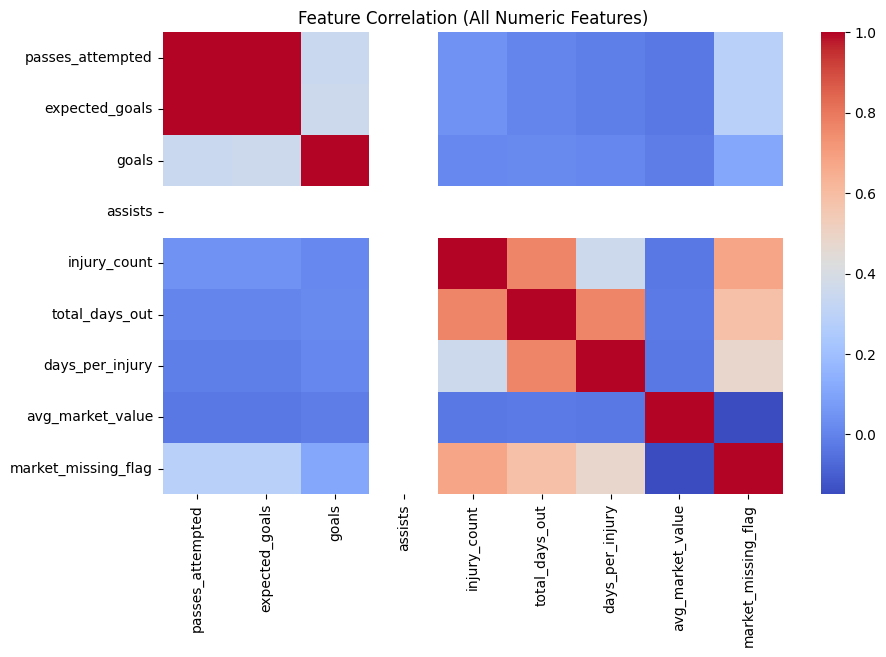

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df_all.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation (All Numeric Features)")
plt.show()


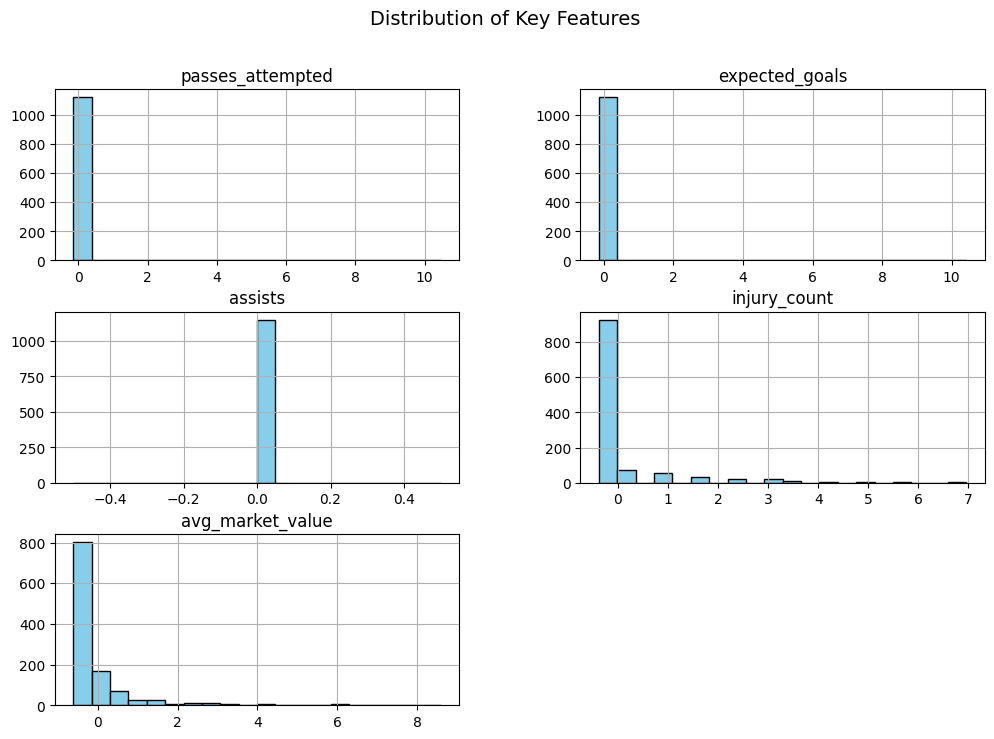

In [ ]:
# Example: plot distributions of key numeric features
key_features = ["passes_attempted", "expected_goals", "assists", "injury_count", "avg_market_value"]

df_plot = df_all[key_features].dropna()

df_plot.hist(bins=20, figsize=(12,8), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Key Features", fontsize=14)
plt.show()


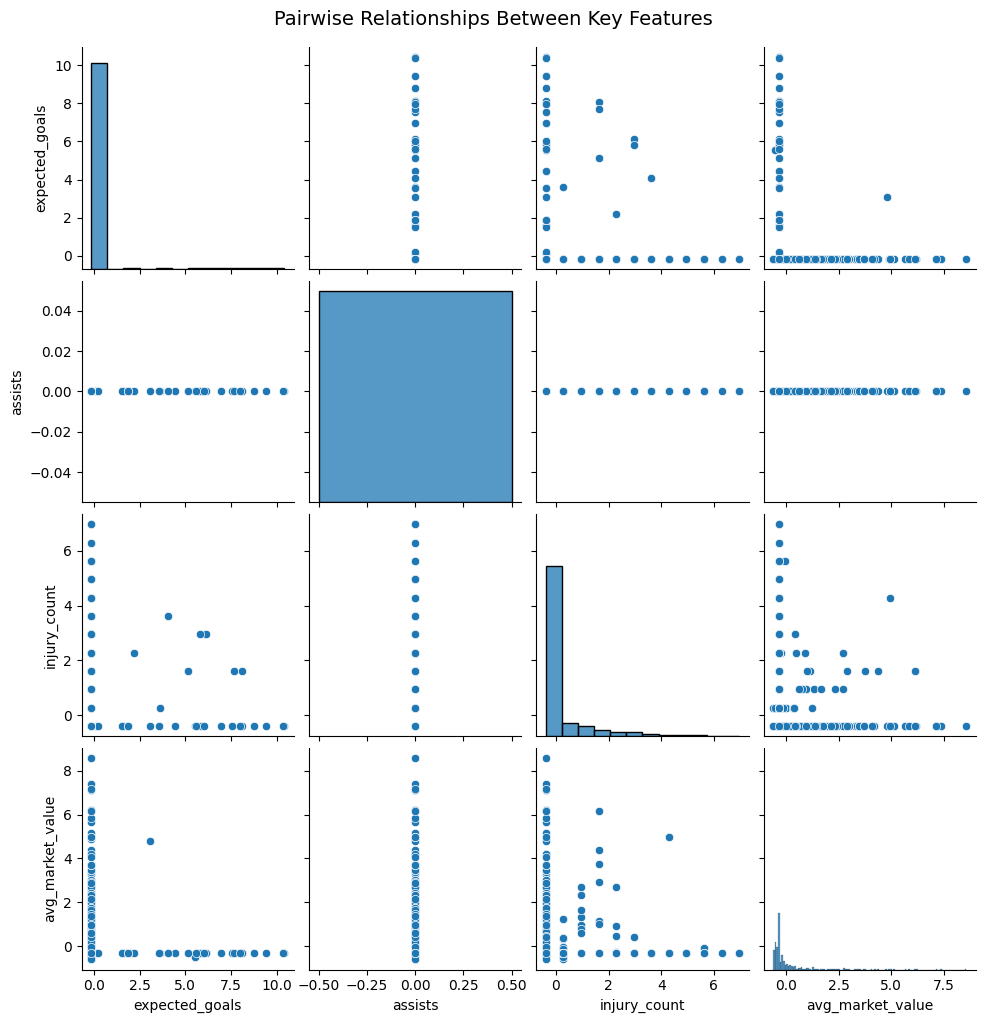

In [ ]:
sns.pairplot(df_all[["expected_goals", "assists", "injury_count", "avg_market_value"]].dropna())
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02, fontsize=14)
plt.show()


In [ ]:
final_out = os.path.join(FE, "player_features_model_final.csv")
df_all.to_csv(final_out, index=False)

print("✅ Final model-ready dataset saved at:", final_out)
print("Shape:", df_all.shape)


✅ Final model-ready dataset saved at: C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features_model_final.csv
Shape: (1148, 10)


In [ ]:
import pandas as pd

# Load player_features (the one we built in Phase 5)
player_features = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features.csv")

print("✅ Player features loaded:", player_features.shape)
print(player_features.head(5))



✅ Player features loaded: (1148, 8)
              player  passes_attempted  expected_goals  goals assists  \
0    Aaron Boupendza               NaN             NaN    NaN     NaN   
1       Aaron Hickey               NaN             NaN    NaN     NaN   
2       Aaron Lennon               NaN             NaN    NaN     NaN   
3  Aaron Wan-Bissaka               NaN             NaN    NaN     NaN   
4      Aarón Herrera               NaN             NaN    NaN     NaN   

   injury_count  total_days_out  avg_market_value  
0           NaN             NaN              7.00  
1           2.0           599.0             16.50  
2           1.0            19.0               NaN  
3           4.0            79.0               NaN  
4           NaN             NaN              4.71  


In [ ]:
tweets = pd.read_csv(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\cleaned_data\tweets_clean.csv")

print("✅ Tweets loaded:", tweets.shape)
print(tweets.head(3))


✅ Tweets loaded: (22524, 6)
   Unnamed: 0               Date Created  Number of Likes     Source of Tweet  \
0           0  2022-11-20 23:59:21+00:00                4     Twitter Web App   
1           1  2022-11-20 23:59:01+00:00                3  Twitter for iPhone   
2           2  2022-11-20 23:58:41+00:00                1  Twitter for iPhone   

                                               Tweet Sentiment  
0  What are we drinking today @TucanTribe \n@MadB...   neutral  
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...  positive  
2  Worth reading while watching #WorldCup2022 htt...  positive  


In [ ]:
# Build a list of players
players = player_features["player"].dropna().unique().tolist()

# Map tweets to players if name appears inside Tweet text
def find_player(tweet):
    tweet_lower = str(tweet).lower()
    for p in players:
        if isinstance(p, str) and p.lower() in tweet_lower:
            return p
    return None

tweets["player"] = tweets["Tweet"].apply(find_player)

print("✅ Player column added")
print(tweets[["Tweet", "player"]].head(10))


✅ Player column added
                                               Tweet player
0  What are we drinking today @TucanTribe \n@MadB...   None
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...   None
2  Worth reading while watching #WorldCup2022 htt...   None
3  Golden Maknae shinning bright\n\nhttps://t.co/...   None
4  If the BBC cares so much about human rights, h...   None
5  And like, will the mexican fans be able to scr...   None
6  Look like a only me and the Jamaican football ...   None
7  Really? Football on a Monday morning at 9 and ...   None
8  As the World Cup starts in Qatar, it’s Black A...   None
9  #WorldCup2022 @ITVSport &amp; @LFSYSTEMMUSIC g...   None


In [ ]:
sentiment_features = tweets.groupby("player", as_index=False)["Sentiment"].apply(lambda x: x.value_counts(normalize=True).to_dict())


In [ ]:
sentiment_features = tweets.groupby("player", as_index=False)["Sentiment"].apply(lambda x: x.value_counts(normalize=True).to_dict())


In [ ]:
# Average sentiment score per player
sentiment_map = {"positive": 1, "neutral": 0, "negative": -1}
tweets["sentiment_score"] = tweets["Sentiment"].map(sentiment_map)

sentiment_features = (
    tweets.groupby("player", as_index=False)["sentiment_score"].mean()
    .rename(columns={"sentiment_score": "avg_sentiment"})
)

print("✅ Sentiment features created:", sentiment_features.shape)
print(sentiment_features.head(10))


✅ Sentiment features created: (50, 2)
              player  avg_sentiment
0              Allan       0.000000
1    Anthony Martial      -0.428571
2             Antony       0.833333
3              Artur       1.000000
4               Beto       0.666667
5               Biel       0.000000
6        Bukayo Saka       0.500000
7           Casemiro       1.000000
8     Chris Richards       0.000000
9  Christian Eriksen       1.000000


In [ ]:
# Merge sentiment with player_features
player_features_final = player_features.merge(sentiment_features, on="player", how="left")

# Save
out_path = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features_final.csv"
player_features_final.to_csv(out_path, index=False)

print("📁 Final dataset saved:", out_path)
print("Shape:", player_features_final.shape)
print(player_features_final.head(10))


📁 Final dataset saved: C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features_final.csv
Shape: (1148, 9)
               player  passes_attempted  expected_goals  goals assists  \
0     Aaron Boupendza               NaN             NaN    NaN     NaN   
1        Aaron Hickey               NaN             NaN    NaN     NaN   
2        Aaron Lennon               NaN             NaN    NaN     NaN   
3   Aaron Wan-Bissaka               NaN             NaN    NaN     NaN   
4       Aarón Herrera               NaN             NaN    NaN     NaN   
5   Abdelhamid Sabiri               NaN             NaN    NaN     NaN   
6       Abdou Harroui               NaN             NaN    NaN     NaN   
7  Abdoulaye Doucouré               NaN             NaN    NaN     NaN   
8      Abdoulaye Seck               NaN             NaN    NaN     NaN   
9         Abdul Mumin               NaN             NaN    NaN     NaN   

   injury_count  total_days_out  avg_market_value  av

In [ ]:
print("Columns in Final Player Features:", player_features_final.columns.tolist())
print("\nMissing values per column:\n", player_features_final.isna().sum())


Columns in Final Player Features: ['player', 'passes_attempted', 'expected_goals', 'goals', 'assists', 'injury_count', 'total_days_out', 'avg_market_value', 'avg_sentiment']

Missing values per column:
 player                 0
passes_attempted    1117
expected_goals      1117
goals               1117
assists             1117
injury_count         924
total_days_out       924
avg_market_value     210
avg_sentiment       1098
dtype: int64


In [ ]:
# WEEK 2 - PREPROCESSING & FEATURES
import json
import pandas as pd
from pathlib import Path   # ✅ import Path

# Select Bundesliga 2023/24
comp_id, season_id = 9, 281   
matches_file = Path(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\open-data-master\data\matches\9\281.json")

# Load JSON
with open(matches_file, "r", encoding="utf-8") as f:
    matches = json.load(f)

# Normalize JSON into DataFrame
matches_df = pd.json_normalize(matches)

print("Matches:", matches_df.shape)
print(matches_df[['match_id','match_date','home_team.home_team_name','away_team.away_team_name']].head())


Matches: (34, 42)
   match_id  match_date home_team.home_team_name away_team.away_team_name
0   3895302  2024-04-14         Bayer Leverkusen            Werder Bremen
1   3895292  2024-04-06             Union Berlin         Bayer Leverkusen
2   3895333  2024-05-05      Eintracht Frankfurt         Bayer Leverkusen
3   3895340  2024-05-12                   Bochum         Bayer Leverkusen
4   3895348  2024-05-18         Bayer Leverkusen                 Augsburg


In [ ]:
# WEEK 2 - PREPROCESSING & FEATURES
import json
import pandas as pd
from pathlib import Path   # ✅ import Path

# Select Bundesliga 2023/24
comp_id, season_id = 9, 281   
matches_file = Path(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\open-data-master\data\matches\9\281.json")

# Load JSON
with open(matches_file, "r", encoding="utf-8") as f:
    matches = json.load(f)

# Normalize JSON into DataFrame
matches_df = pd.json_normalize(matches)

print("Matches:", matches_df.shape)
print(matches_df[['match_id','match_date','home_team.home_team_name','away_team.away_team_name']].head())


Matches: (34, 42)
   match_id  match_date home_team.home_team_name away_team.away_team_name
0   3895302  2024-04-14         Bayer Leverkusen            Werder Bremen
1   3895292  2024-04-06             Union Berlin         Bayer Leverkusen
2   3895333  2024-05-05      Eintracht Frankfurt         Bayer Leverkusen
3   3895340  2024-05-12                   Bochum         Bayer Leverkusen
4   3895348  2024-05-18         Bayer Leverkusen                 Augsburg


In [ ]:
# WEEK 2 - PREPROCESSING & FEATURES
comp_id, season_id = 9, 281   # Bundesliga 2023/24
matches_file = Path(r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\open-data-master\data\matches\9\281.json")

with open(matches_file, "r", encoding="utf-8") as f:
    matches = json.load(f)
matches_df = pd.json_normalize(matches)

print("Matches:", matches_df.shape)
print(matches_df[['match_id','match_date','home_team.home_team_name','away_team.away_team_name']].head())


Matches: (34, 42)
   match_id  match_date home_team.home_team_name away_team.away_team_name
0   3895302  2024-04-14         Bayer Leverkusen            Werder Bremen
1   3895292  2024-04-06             Union Berlin         Bayer Leverkusen
2   3895333  2024-05-05      Eintracht Frankfurt         Bayer Leverkusen
3   3895340  2024-05-12                   Bochum         Bayer Leverkusen
4   3895348  2024-05-18         Bayer Leverkusen                 Augsburg
